In [168]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# 1.데이터 다루기
(구조 파악, 전처리 준비)

In [169]:
flight = pd.read_csv('./Flight_Price_Prediction/Clean_Dataset.csv', encoding='cp949')
flight

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## 1-1. 데이터 기본 정보 확인하기

### 1-1-1. 미리보기(head, tail)

In [170]:
# head(default = 5)확인
flight.head()

# tail(default = 5) 확인
flight.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


### 1-1-2. 기본 정보 확인(info)
 - 행*열 정보 : shape
 - 컬럼명 : columns
 - 기본 정보 : info
 - 통계 요약 정보 : describe
 - 타입 확인 : dtypes
 - 특정 컬럼의 유니크 값의 개수 : value_counts

In [171]:
# 행과 열 확인하기
flight.shape

# 컬럼명 확인하기
flight.columns

# 각 컬럼, null값 개수, 타입 등 기본 정보 확인하기
flight.info()

# 통계 요약 정보 확인하기
flight.describe()

# 데이터 컬럼별 타입(type) 확인하기
flight.dtypes

# 각 컬럼의 unique 값에 대한 개수 확인하기
flight['airline'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

## 1-2. 데이터 다루기 

### 1-2-1. 컬럼명을 이용해서 데이터 가져오기

* Fancy Indexing  
특정 인덱스 위치를 지정하는 형태의 리스트를 인덱싱 조건으로 적용하는 방법
비연속적으로 여러 개의 값을 가지고 올 수 있다. 

In [172]:
# 컬럼 선택하기
    # Series 형태로 출력되는 경우
flight.departure_time
flight['departure_time']

    # pandas 형태로 출력하기
flight[['departure_time']]

    # 여러개 출력하기
flight[['airline', 'departure_time', 'source_city']]

,airline,departure_time,source_city
0,SpiceJet,Evening,Delhi
1,SpiceJet,Early_Morning,Delhi
2,AirAsia,Early_Morning,Delhi
3,Vistara,Morning,Delhi
4,Vistara,Morning,Delhi
...,...,...,...
300148,Vistara,Morning,Chennai
300149,Vistara,Afternoon,Chennai
300150,Vistara,Early_Morning,Chennai
300151,Vistara,Early_Morning,Chennai


### 1-2-2. 특정 행, 열을 이용해서 데이터 가져오기

* loc(location) : 행과 열에 인덱스와 컬럼명을 통해 접근한다.(설정되어 있는 인덱스 그대로 사용)
* iloc(integer location) : 행과 열에 인덱스를 이용해 접근한다.(0 based index 사용)

In [173]:
flight.index = np.arange(100, flight.shape[0]+100)

In [174]:
# loc로 특정 행 가져오기
flight.loc[[102,202,302]]

# iloc로 특정 행 가져오기
flight.iloc[[2,102,202]]

# loc 사용해서 행,열 가져오기
flight.loc[[102,302], ['airline', 'flight']]

#iloc 사용해서 행,열 가져오기
flight.iloc[[2,202], [1, 2, 3]]

,airline,flight,source_city
102,AirAsia,I5-764,Delhi
302,Vistara,UK-879,Delhi


### 1-2-3. 조건으로 데이터 가져오기

In [175]:
flight.index = np.arange(0,flight.shape[0])

- price가 12,000 초과이고 airline이 Air_india인 항목 추출하기

In [176]:
price_cond = flight['price'] > 12000
flight_name_cond = flight['airline'] == 'Air_india'

flight[price_cond & flight_name_cond]


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


### 1-2-4. 데이터 내용 변경하기

#### 1-2-4-1. 데이터 추가하기(insert, 연산)
- 컬럼 연산, insert 사용

In [177]:
flight['price_twice'] = flight['price']*2
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_twice
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,11906
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,11906
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,11912
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,11910
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,11910


In [178]:
flight['price_calculcate'] = flight['price'] + flight['price_twice']
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_twice,price_calculcate
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,11906,17859
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,11906,17859
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,11912,17868
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,11910,17865
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,11910,17865


* insert(loc, column, value, allow_duplicates)
* insert(삽입될 위치, 삽입될 컬럼명, 컬럼값, 중복 열 사입 혀용 여부(Treu, False))

In [179]:
flight.insert(10, 'duration2', flight.duration*10)
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration2,days_left,price,price_twice,price_calculcate
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,21.7,1,5953,11906,17859
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,23.3,1,5953,11906,17859
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,21.7,1,5956,11912,17868
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,22.5,1,5955,11910,17865
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,23.3,1,5955,11910,17865


#### 1-2-4-2. 데이터 삭제하기
- drop(columns=컬럼명, axis=삭제 기준, inplace=원본 교체 여부)
    - axis = 1 : 열 삭제
    - axis = 0 : 행 삭제

In [180]:
flight.drop(columns = 'price_calculcate', axis=1, inplace=True)
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration2,days_left,price,price_twice
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,21.7,1,5953,11906
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,23.3,1,5953,11906
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,21.7,1,5956,11912
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,22.5,1,5955,11910
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,23.3,1,5955,11910


### 1-2-5. 컬럼명 변경(rename)
데이터 분석을 위한 전처리 과정에서 컬럼명은 단순하고 직관적이야 한다.  
이를 위한 컬럼명 변경을 위한 방법은 다음과 같다.

In [181]:
flight.rename(columns={'airline':'airline_name', 'source_city':'departure_city'}, inplace=True)
flight.head(2)

,Unnamed: 0,airline_name,flight,departure_city,departure_time,stops,arrival_time,destination_city,class,duration,duration2,days_left,price,price_twice
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,21.7,1,5953,11906
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,23.3,1,5953,11906


### 1-2-6. 데이터 정렬(sort_value, gropuby, aggregate)
데이터를 원하는 컬럼명을 기준으로 정렬하기 위해서 'sort_value' 메소드를 사용한다.

##### sort_value

In [182]:
flight.sort_values(by='Unnamed: 0', ascending=False).head(5)

,Unnamed: 0,airline_name,flight,departure_city,departure_time,stops,arrival_time,destination_city,class,duration,duration2,days_left,price,price_twice
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,100.8,49,81585,163170
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,100.0,49,81585,163170
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,138.3,49,79099,158198
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,104.2,49,77105,154210
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,100.8,49,69265,138530


##### groupby
sql의 groupby와 동일하다.  
같은 값을 하나로 묶어서 통계나 집계 결과를 확인하기 위해 사용한다.  
- split : 그룹별로 데이터 나누기
- Apply : 각 그룹별로 집계 합수 적용
- Combine : 그룹별 집계 결과를 하나로 합침

- level : by=[컬럼명1, 컬럼명2, ...] : 컬럼명1로 묶고 컬럼명2로 묶게 되는데, 이 때 컬럼명1을 level=0, 컬럼명2를 level=1으로 본다.

** gropuby의 리턴값은 객체임으로 이를 잘 활용해야 한다.

In [183]:
airline_group = flight.groupby('airline_name')
airline_group

In [184]:
airline_group.groups

{'AirAsia': [2, 18, 19, 27, 48, 141, 147, 148, 157, 265, 290, 325, 435, 450, 608, 609, 623, 706, 746, 782, 783, 784, 814, 978, 993, 1085, 1088, 1133, 1210, 1248, 1261, 1284, 1323, 1341, 1343, 1461, 1466, 1483, 1526, 1583, 1685, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1728, 1759, 1760, 1761, 1762, 1866, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1947, 1972, 1974, 1976, 1977, 1991, 1992, 2083, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2167, 2194, 2196, 2264, 2265, 2292, 2305, 2350, 2351, 2352, 2353, 2354, 2355, 2397, 2422, 2423, 2443, 2444, 2465, 2484, ...], 'Air_India': [16, 17, 23, 37, 40, 41, 42, 43, 44, 49, 50, 51, 52, 53, 60, 71, 74, 75, 82, 86, 87, 96, 98, 107, 108, 110, 113, 114, 115, 117, 142, 143, 144, 145, 146, 151, 152, 162, 163, 164, 166, 168, 173, 182, 189, 191, 193, 195, 196, 197, 198, 199, 207, 211, 223, 225, 229, 236, 237, 241, 242, 243, 247, 250, 266, 267, 268, 269, 272, 280, 291, 295, 303, 309, 314, 315, 316, 319, 321, 329, 333, 343, 352, 357, 3

In [185]:
# 그룹별 개수 확인
airline_group.count()

# 그룹별 최소값, 최대값, 평균 확인
    # 각 컬럼별 최대 최소값을 한 줄에 넣는 것임.
airline_group.mean()  
airline_group.min()
airline_group.max() 

C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\3876414700.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airline_group.mean()


,Unnamed: 0,flight,departure_city,departure_time,stops,arrival_time,destination_city,class,duration,duration2,days_left,price,price_twice
airline_name,,,,,,,,,,,,,
AirAsia,206617,I5-996,Mumbai,Night,zero,Night,Mumbai,Economy,19.58,195.8,49,31917,63834
Air_India,300147,AI-9991,Mumbai,Night,zero,Night,Mumbai,Economy,49.83,498.3,49,90970,181940
GO_FIRST,206589,G8-962,Mumbai,Night,zero,Night,Mumbai,Economy,22.50,225.0,49,32803,65606
Indigo,206650,6E-998,Mumbai,Night,zero,Night,Mumbai,Economy,15.42,154.2,49,31952,63904
SpiceJet,206184,SG-9974,Mumbai,Night,zero,Night,Mumbai,Economy,27.92,279.2,49,34158,68316
Vistara,300152,UK-996,Mumbai,Night,zero,Night,Mumbai,Economy,47.08,470.8,49,123071,246142


In [186]:
flight[flight['Unnamed: 0'] == 206617]

,Unnamed: 0,airline_name,flight,departure_city,departure_time,stops,arrival_time,destination_city,class,duration,duration2,days_left,price,price_twice
206617,206617,AirAsia,I5-2462,Chennai,Night,one,Morning,Hyderabad,Economy,10.17,101.7,49,1550,3100


In [187]:
# 특정 컬럼만 가져오기
airline_group.mean()[['price']]

# mulit-indexing을 이용한 gouypby
flight.groupby(by=['airline_name', 'arrival_time']).mean()

C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\2189812123.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airline_group.mean()[['price']]
C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\2189812123.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight.groupby(by=['airline_name', 'arrival_time']).mean()


Unnamed: 0   duration   duration2  days_left  \
airline_name arrival_time                                                     
AirAsia      Afternoon       88816.983918   7.496335   74.963353  26.980507   
             Early_Morning   99485.108742   9.454591   94.545913  27.088842   
             Evening         80346.891383   8.628675   86.286749  27.119117   
             Late_Night     105201.948725   9.205835   92.058350  29.071899   
             Morning        107012.537642   9.934108   99.341079  27.857339   
             Night           88657.478861   8.740391   87.403911  27.487202   
Air_India    Afternoon      162295.572046  15.954563  159.545629  25.827142   
             Early_Morning  138717.490455  17.037971  170.379706  27.539501   
             Evening        166211.387508  15.878056  158.780563  24.942981   
             Late_Night     166665.450239  13.214077  132.140766  24.301435   
             Morning        162496.968910  16.411557  164.115569  25.655767   
             Night          164175.090257  14.230348  142.303482  25.451735   
GO_FIRST     Afternoon       90534.220872   7.510892   75.108924  27.706789   
             Early_Morning   85682.954898  10.148961  101.489612  27.533457   
             Evening         86610.596935   8.284801   82.848012  27.474795   
             Late_Night      90382.433765   7.957369   79.573686  29.245500   
             Morning         84289.646143   9.633676   96.336762  26.265846   
             Night           87864.810293   9.087003   90.870027  26.971360   
Indigo       Afternoon      106570.254921   5.483550   54.835496  26.018053   
             Early_Morning  116218.737879   5.913914   59.139141  29.270398   
             Evening        113633.002071   6.255353   62.553533  25.200587   
             Late_Night     110790.778003   5.652350   56.523502  27.798553   
             Morning         93504.652953   4.389309   43.893088  26.835436   
             Night          114668.999528   6.176535   61.765349  26.114164   
SpiceJet     Afternoon       96337.994076  14.371315  143.713152  25.279621   
             Early_Morning   86212.106796  13.395576  133.955756  20.773925   
             Evening         97825.642908  13.826714  138.267142  24.349964   
             Late_Night     125755.550439   7.612829   76.128289  23.339912   
             Morning         88454.211881  12.866352  128.663525  24.699010   
             Night           87037.019268  11.825869  118.258687  24.129980   
Vistara      Afternoon      176534.776824  12.114402  121.144024  25.469405   
             Early_Morning  178997.086816  15.122223  151.222232  26.597803   
             Evening        178147.125191  13.679788  136.797881  25.935980   
             Late_Night     195942.545350  10.051710  100.517100  26.937031   
             Morning        177197.110088  14.913937  149.139373  25.788161   
             Night          177240.740619  12.191358  121.913585  25.939596   

                                   price   price_twice  
airline_name arrival_time                               
AirAsia      Afternoon       4206.467836   8412.935673  
             Early_Morning   3632.676617   7265.353234  
             Evening         4539.570963   9079.141926  
             Late_Night      3828.437410   7656.874821  
             Morning         3846.900653   7693.801306  
             Night           4320.171700   8640.343399  
Air_India    Afternoon      23426.571700  46853.143400  
             Early_Morning  18805.551542  37611.103084  
             Evening        24459.593397  48919.186793  
             Late_Night     28014.163158  56028.326316  
             Morning        22792.180401  45584.360801  
             Night          23683.386323  47366.772646  
GO_FIRST     Afternoon       5511.206937  11022.413875  
             Early_Morning   5537.433272  11074.866543  
             Evening         6022.345547  12044.691095  
             Late_Night      5306.723182  10613.446364  
  

In [188]:
# Vistara에 대한 정보만 확인하기
flight.groupby(by=['airline_name', 'arrival_time']).mean().loc['Vistara']

C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\1372300385.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight.groupby(by=['airline_name', 'arrival_time']).mean().loc['Vistara']


,Unnamed: 0,duration,duration2,days_left,price,price_twice
arrival_time,,,,,,
Afternoon,176534.776824,12.114402,121.144024,25.469405,27905.873134,55811.746268
Early_Morning,178997.086816,15.122223,151.222232,26.597803,28597.738475,57195.476950
Evening,178147.125191,13.679788,136.797881,25.935980,31225.269687,62450.539373
Late_Night,195942.545350,10.051710,100.517100,26.937031,29699.180243,59398.360485
Morning,177197.110088,14.913937,149.139373,25.788161,30180.664694,60361.329387
Night,177240.740619,12.191358,121.913585,25.939596,30773.372570,61546.745140


##### 인덱스(set_index)로 grouby하기

In [189]:
flight.set_index(['airline_name', 'arrival_time']).groupby(level=1).mean()

C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\819604132.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flight.set_index(['airline_name', 'arrival_time']).groupby(level=1).mean()


,Unnamed: 0,duration,duration2,days_left,price,price_twice
arrival_time,,,,,,
Afternoon,144598.319699,11.393490,113.934901,25.958940,18494.598993,36989.197986
Early_Morning,131801.993903,12.559448,125.594480,27.182201,14993.139521,29986.279043
Evening,155592.336900,12.621578,126.215785,25.691240,23044.371615,46088.743230
Late_Night,124703.693308,8.732261,87.322613,27.629384,11284.906078,22569.812156
Morning,154177.489583,13.940608,139.406080,25.909285,22231.076098,44462.152196
Night,151785.871999,11.521187,115.211869,25.910715,21586.758341,43173.516682


##### Aggregate로 집계하기  
그룹화된 결과를 한 번에 확인할 수 있다.

In [190]:
flight.set_index(['airline_name', 'arrival_time']).groupby(level=[0,1]).aggregate([np.mean, np.max, np.min])

C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\2326876172.py:1: FutureWarning: ['flight', 'departure_city', 'departure_time', 'stops', 'destination_city', 'class'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  flight.set_index(['airline_name', 'arrival_time']).groupby(level=[0,1]).aggregate([np.mean, np.max, np.min])


Unnamed: 0                  duration         \
                                     mean    amax   amin       mean   amax   
airline_name arrival_time                                                    
AirAsia      Afternoon       88816.983918  202598     27   7.496335  18.33   
             Early_Morning   99485.108742  193744      2   9.454591  15.50   
             Evening         80346.891383  205846  10006   8.628675  14.58   
             Late_Night     105201.948725  202571   1693   9.205835  17.33   
             Morning        107012.537642  206617     19   9.934108  19.58   
             Night           88657.478861  202569   1323   8.740391  18.00   
Air_India    Afternoon      162295.572046  299989     37  15.954563  44.50   
             Early_Morning  138717.490455  300114   8846  17.037971  40.75   
             Evening        166211.387508  299935    110  15.878056  49.83   
             Late_Night     166665.450239  295659    193  13.214077  41.58   
             Morning        162496.968910  300146     16  16.411557  45.83   
             Night          164175.090257  300147     23  14.230348  41.83   
GO_FIRST     Afternoon       90534.220872  206589     11   7.510892  17.92   
             Early_Morning   85682.954898  202069    150  10.148961  22.50   
             Evening         86610.596935  206183      9   8.284801  15.50   
             Late_Night      90382.433765  197767   1521   7.957369  16.08   
             Morning         84289.646143  187519      8   9.633676  20.67   
             Night           87864.810293  206320     21   9.087003  17.00   
Indigo       Afternoon      106570.254921  206650     13   5.483550  10.92   
             Early_Morning  116218.737879  206607   1678   5.913914  12.42   
             Evening        113633.002071  206614     14   6.255353  12.67   
             Late_Night     110790.778003  206602    772   5.652350  12.33   
             Morning         93504.652953  206610     12   4.389309  12.50   
             Night          114668.999528  206615     29   6.176535  15.42   
SpiceJet     Afternoon       96337.994076  193244     45  14.371315  26.33   
             Early_Morning   86212.106796  206184    275  13.395576  26.33   
             Evening         97825.642908  203920    194  13.826714  27.92   
             Late_Night     125755.550439  187402  10389   7.612829  19.25   
             Morning         88454.211881  203820      1  12.866352  27.50   
             Night           87037.019268  202067      0  11.825869  27.58   
Vistara      Afternoon      176534.776824  300133      3  12.114402  33.08   
             Early_Morning  178997.086816  300125    573  15.122223  26.08   
             Evening        178147.125191  300152      7  13.679788  37.58   
             Late_Night     195942.545350  290332  43306  10.051710  28.33   
             Morning        177197.110088  300138      4  14.913937  47.08   
             Night          177240.740619  300150     46  12.191358  40.00   

                                   duration2               days_left       \
                            amin        mean   amax  amin       mean amax   
airline_name arrival_time                                                   
AirAsia      Afternoon      0.92   74.963353  183.3   9.2  26.980507   49   
             Early_Morning  0.92   94.545913  155.0   9.2  27.088842   49   
             Evening        0.92   86.286749  145.8   9.2  27.119117   49   
             Late_Night     1.25   92.058350  173.3  12.5  29.071899   49   
             Morning        1.00   99.341079  195.8  10.0  27.857339   49   
             Night          0.92   87.403911  180.0   9.2  27.487202   49   
Air_India    Afternoon      1.00  159.545629  445.0  10.0  25.827142   49   
             Early_Morning  1.33  170.379706  407.5  13.3  27.539501   49   
             Evening        1.50  158.780563  498.3  15.0  24.942981   49   
             Late_Night     2.58  132.140766  415.8  25.8  24.30

### 1-2-7. 피벗 생성
pivot : 축을 중심으로 회전한다  
열을 기준으로 행 데이터가 회전한다.  

##### pivot

In [191]:
flight = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [192]:
flight

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [193]:
flight.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [194]:
flight.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [195]:
flight.pivot(index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


##### pivot_table

In [196]:
flight = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

table = pd.pivot_table(flight, values='D', index=['A', 'B'], columns=['C'], aggfunc="sum")
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [197]:
table = pd.pivot_table(flight, values=['D', 'E'], index=['A', 'C'], aggfunc={"mean", "min", 'sum'})
table

D                 E        
               mean min sum      mean min sum
A   C                                        
bar large  5.500000   4  11  7.500000   6  15
    small  5.500000   5  11  8.500000   8  17
foo large  2.000000   2   4  4.500000   4   9
    small  2.333333   1   7  4.333333   2  13

In [198]:
table = pd.pivot_table(flight, values=['D', 'E'], index=['A', 'C'], aggfunc={'D':"mean", 'E' : ["mean", "min", 'sum']})
table

D         E        
               mean      mean min sum
A   C                                
bar large  5.500000  7.500000   6  15
    small  5.500000  8.500000   8  17
foo large  2.000000  4.500000   4   9
    small  2.333333  4.333333   2  13

### 1-2-8. 인덱스 및 칼럼 레벨 변경(stack, unstack)

### 1-2-9. flight 병합

In [199]:
df1 = pd.DataFrame({'name': ['사과', '배', '감', '수박', '메론'], 'price': [500, 1000, 2500, 5000, 3000]}, index=[0,1,2,3,4])
df2 = pd.DataFrame({'name': ['수박', '멜론', '딸기', '키위', '딸기'], 'price': [5000,3000,1000,6000,700]}, index=[3,4,5,6,7])

In [200]:
df1

,name,price
0,사과,500
1,배,1000
2,감,2500
3,수박,5000
4,메론,3000


In [202]:
df2

,name,price
3,수박,5000
4,멜론,3000
5,딸기,1000
6,키위,6000
7,딸기,700


##### pandas.concat()
- 대상(series or dataframe),    
- axis=0, (axis=1 : 가로로 합침)   
- join='outer', (합집합 / inner : 교집합)  
- ignore_index=False, (중복 인덱스 무시하고 새로 부여할건지, Yes=True)  
- keys=None, (대상 구분하는 key를 넣을거면 리스트 형태로 부여하기)  
- levels=None,   
- names=None,(dataframe의 key와 index에 이름 부여)   
- verify_integrity=False, (중복인덱스 방지 여부)  
- sort=False,    
- copy=None

In [203]:
pd.concat([flight1,df2], keys=['s1', 's2'], names=['Series name', 'Row ID'])

name  price
Series name Row ID            
s1          0        사과    500
            1         배   1000
            2         감   2500
            3        수박   5000
            4        메론   3000
s2          3        수박   5000
            4        멜론   3000
            5        딸기   1000
            6        키위   6000
            7        딸기    700

In [204]:
# pd.concat([flight1,flight2], verify_integrity=True)

##### pandas.merge/join() 
- concat과 다르게 **특정 Key**를 기준으로 병합할 수 있다.

In [205]:
pd.merge(df1, df2, on='name', how='outer')
pd.merge(df1, df2, on='name', how='right')
pd.merge(df1, df2, on='name', how='left')
pd.merge(df1, df2, on='name', how='inner')

,name,price_x,price_y
0,수박,5000,5000


on을 사용하지 않고 인덱스를 사전에 맞춰주면, 병합 테이블에 중복되는 인덱스를 모두 포함하는 inner 결과를 출력할 수 있다.

In [206]:
pd.merge(df1, df2, left_index=True, right_index=True)

,name_x,price_x,name_y,price_y
3,수박,5000,수박,5000
4,메론,3000,멜론,3000


## 1-3. 데이터 이해하기

### 1-3-1. 요약 통계량

In [207]:
flight = pd.read_csv('./Flight_Price_Prediction/Clean_Dataset.csv', encoding='cp949', index_col='Unnamed: 0')

In [208]:
flight.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


##### describe(include='all') 고유 데이터 수, 최빈값, 칼럼에서 최빈값의 개수 등이 추가로 나온다.

In [209]:
flight.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


### 1-3-2. 상관계수
- 상관계수 : 두 변수 간의 선형 상관관계를 -1 ~ +1 사이의 값으로 계량화한 수치

In [210]:
flight.corr()

C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\445955774.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  flight.corr()


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


- 해석
    - 비행시간(duration)은 price와 약한 상관관계를 갖는다
    - 상관관계 값이 작아서 특별하게 관계가 있어 보이지 않는다.
    - 비행기 가격(도메인)에 대한 이해를 적용해보자면, 좌석이 큰 영향을 미치기 때문에 그 내용을 적용해줘야 한다.

In [211]:
df_seat_economy = flight[ flight['class'] == 'Economy' ]
df_seat_economy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
206661,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697
206662,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709
206663,Vistara,UK-826,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640
206664,Vistara,UK-822,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640


In [212]:
df_seat_economy.corr()

C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\1944351119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_seat_economy.corr()


,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


### 1-3-3. 교차지표
- 범주형 데이터의 상관관계를 확인하는 방법
  
- 카이제곱(X**2) 검정
    - 확인된 빈도와 기대되는 빈도가 다른지 여부를 검정하기 위해 사용하는 방법으로 x**2 = ((확인값-기대값)**2 / 가대값)의 합 으로 계산한다.

In [213]:
pd.crosstab(flight['source_city'], flight['departure_time'])

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


- 아침 점심 저녁 등 시간별 비행편 수를 확인할 수 있다.

# 2.데이터 시각화

## 2-1. 시각화로 데이터 탐색하기


In [214]:
# matplotlib : figure, plot, show

### 2-1-1. Line plot(선 그래프)
- 시간이나 순서에 따른 데이터의 연속적인 변화량을 관찰할 때 사용한다.
- 데이터의 증가 감소에 대한 상태변화를 파악하는데 유용하다.
- 예) 시간에 따른 기온변화, 환율 변동, 전염병 환자 발생 추이

In [215]:
# 항공권 출발 남은 기간에 따른 price 변화 추이 확인하기
days_left = flight.groupby(by='days_left').mean()
days_left.head()

C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\3895771372.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  days_left = flight.groupby(by='days_left').mean()


,duration,price
days_left,,
1,14.250228,21591.867151
2,14.111080,30211.299801
3,14.287476,28976.083569
4,13.742667,25730.905653
5,12.921970,26679.773368


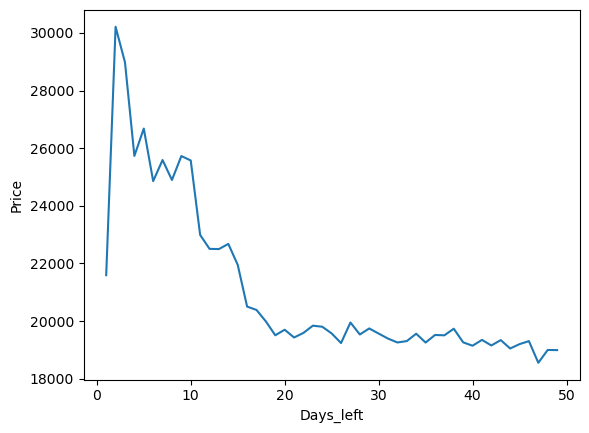

In [216]:
# 위 DF를 선그래프로 만들기
import matplotlib.pyplot as plt
plt.figure() # 시각화 영역 지정
plt.plot(days_left['price']) # price데이터 그리기
plt.xlabel('Days_left')
plt.ylabel('Price')
plt.show()

### 2-1-2. Bar plot(막대 그래프)
- 범주에 대한 통계 데이터를 표현
- 각 항목에 대한 수량을 한눈에 파악하기 쉽고, 비교하기 좋다
- 가로, 세로, 누적, 그룹화된 막대그래프를 사용할 수 있다

C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\225397671.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airline_price = flight.groupby(by='airline').mean()


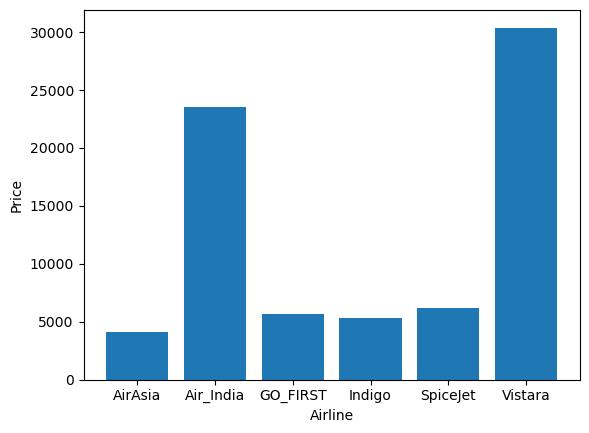

In [217]:
# 항공사별 평균 항공권 가격 비교하기

airline_price = flight.groupby(by='airline').mean()
airline_price.head()

plt.figure()
plt.bar(x=airline_price.index, height=airline_price['price'])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

# Vistara > Air_India > Spicejet 순으로 항공권 가격을 쉽게 비교할 수 있다.

### 2-1-3. Pir plot(파이 그래프)
- 원형 그래프로 각 부분의 **비율**을 부채꼴 모양으로 표현
- 점유율, 투표율, 구성 비율 등을 쉽게 비교할 수 있다

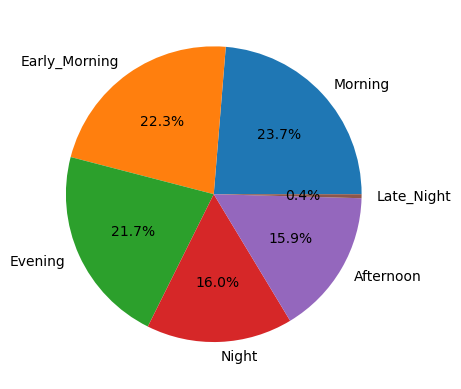

In [218]:
# 출발시간에 따른 비행 스케줄 비교하기
departure_time = flight['departure_time'].value_counts()
departure_time.head()

plt.figure()
plt.pie(x = departure_time, labels = departure_time.index, autopct='%.1f%%')
plt.show()

# Morning시간대 출발이 가장 많고, Late_Night 출발이 가장 적음을 알 수 있다.
# 저녁에 출발하는 것이 조금 많고 오후나 밤은 비슷한 비율을 갖고 있다.

### 2-1-4. Histogram(히스토그램)
- 특정 데이터의 빈도수를 막대 모양으로 표현
- 데이터의 특성과 분포를 파악할 수 있다. 
- 빈도, 빈도밀도, 확률 등의 분포를 그릴 수 있다.

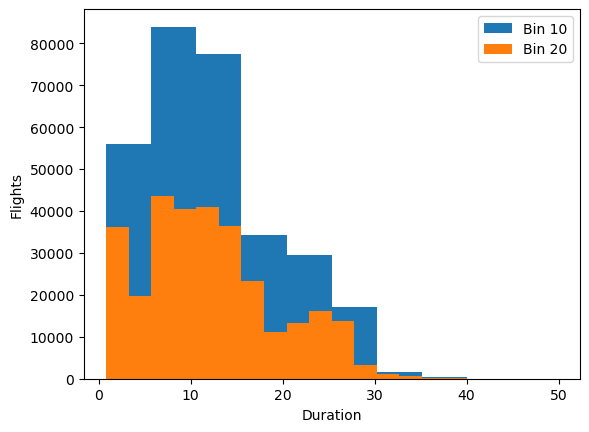

In [219]:
# 목적지까지 소요 시간의 분포 확인하기

plt.figure()
plt.hist(x=flight.duration, bins=10)
plt.hist(x=flight.duration, bins=20)
plt.xlabel('Duration')
plt.ylabel('Flights')
plt.legend(("Bin 10", "Bin 20"))
plt.show()

# 공통적으로 5~15시간 이내가 가장 많은 비중을 차지한다.

### 2-1-5. Box plot(상자 그래프)
- 사분위수를 중심으로 수치적 요약 통계 자료를 시각화할 수 있다.
- 최솟값, 제1사분위수, 중앙값, 제3사분위수, 최댓값 표현
- 이상치를 파악하는데 용이함
    - 이상치 : 정해진 최댓값이나 최솟값보다 크거나 작은 값
    - 최댓값 : 제3사분위수 + 1.5*IQR보다 작은 값 중에 최댓값
    - 제3사분위수 : 75%
    - 중앙값 : 제2사분위수(50%)
    - 제1사분위수 : 25%
    - 최솟값 : 제1사분위수 - 1.5*IQR보다 큰 값 중 최솟값

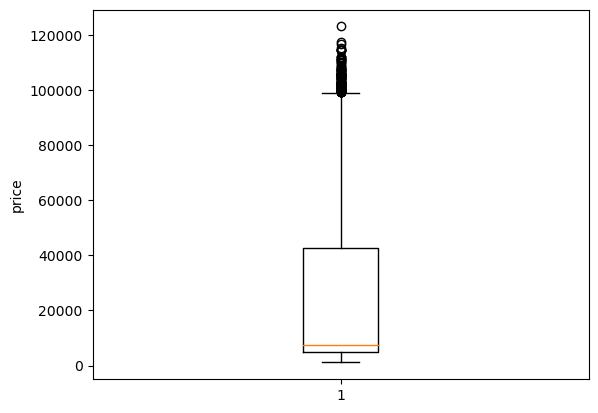

In [220]:
# 비행기 항공권 가격 확인
plt.figure()
plt.boxplot(list(flight.price))
plt.ylabel('price')
plt.show()

<Axes: title={'center': 'price'}, xlabel='departure_time'>

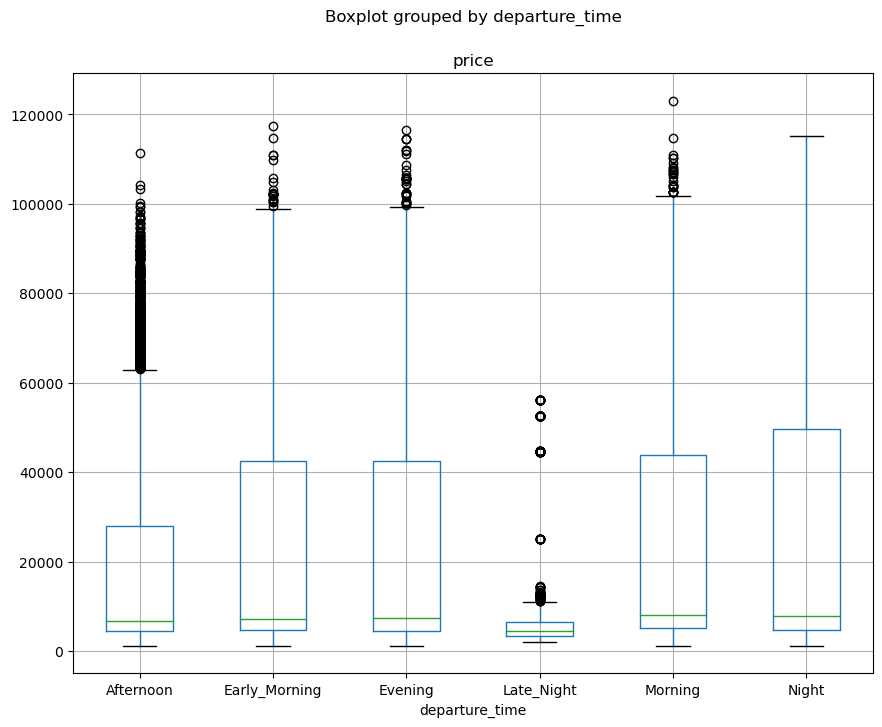

In [221]:
# 비행기 항공권 가격 
flight.boxplot(by='departure_time', column='price', figsize=(10,8))

### 2-1-6. Scatter plot(산점도)
- 2개의 연속형 변수의 관계 파악을 위함(상관관계)
- 점들은 자료들의 관측값을 나타냄

In [222]:
flight_economy = flight[flight['class'] == 'Economy']
flight_business = flight[flight['class'] == 'Business']
flight['class'].unique()

array(['Economy', 'Business'], dtype=object)

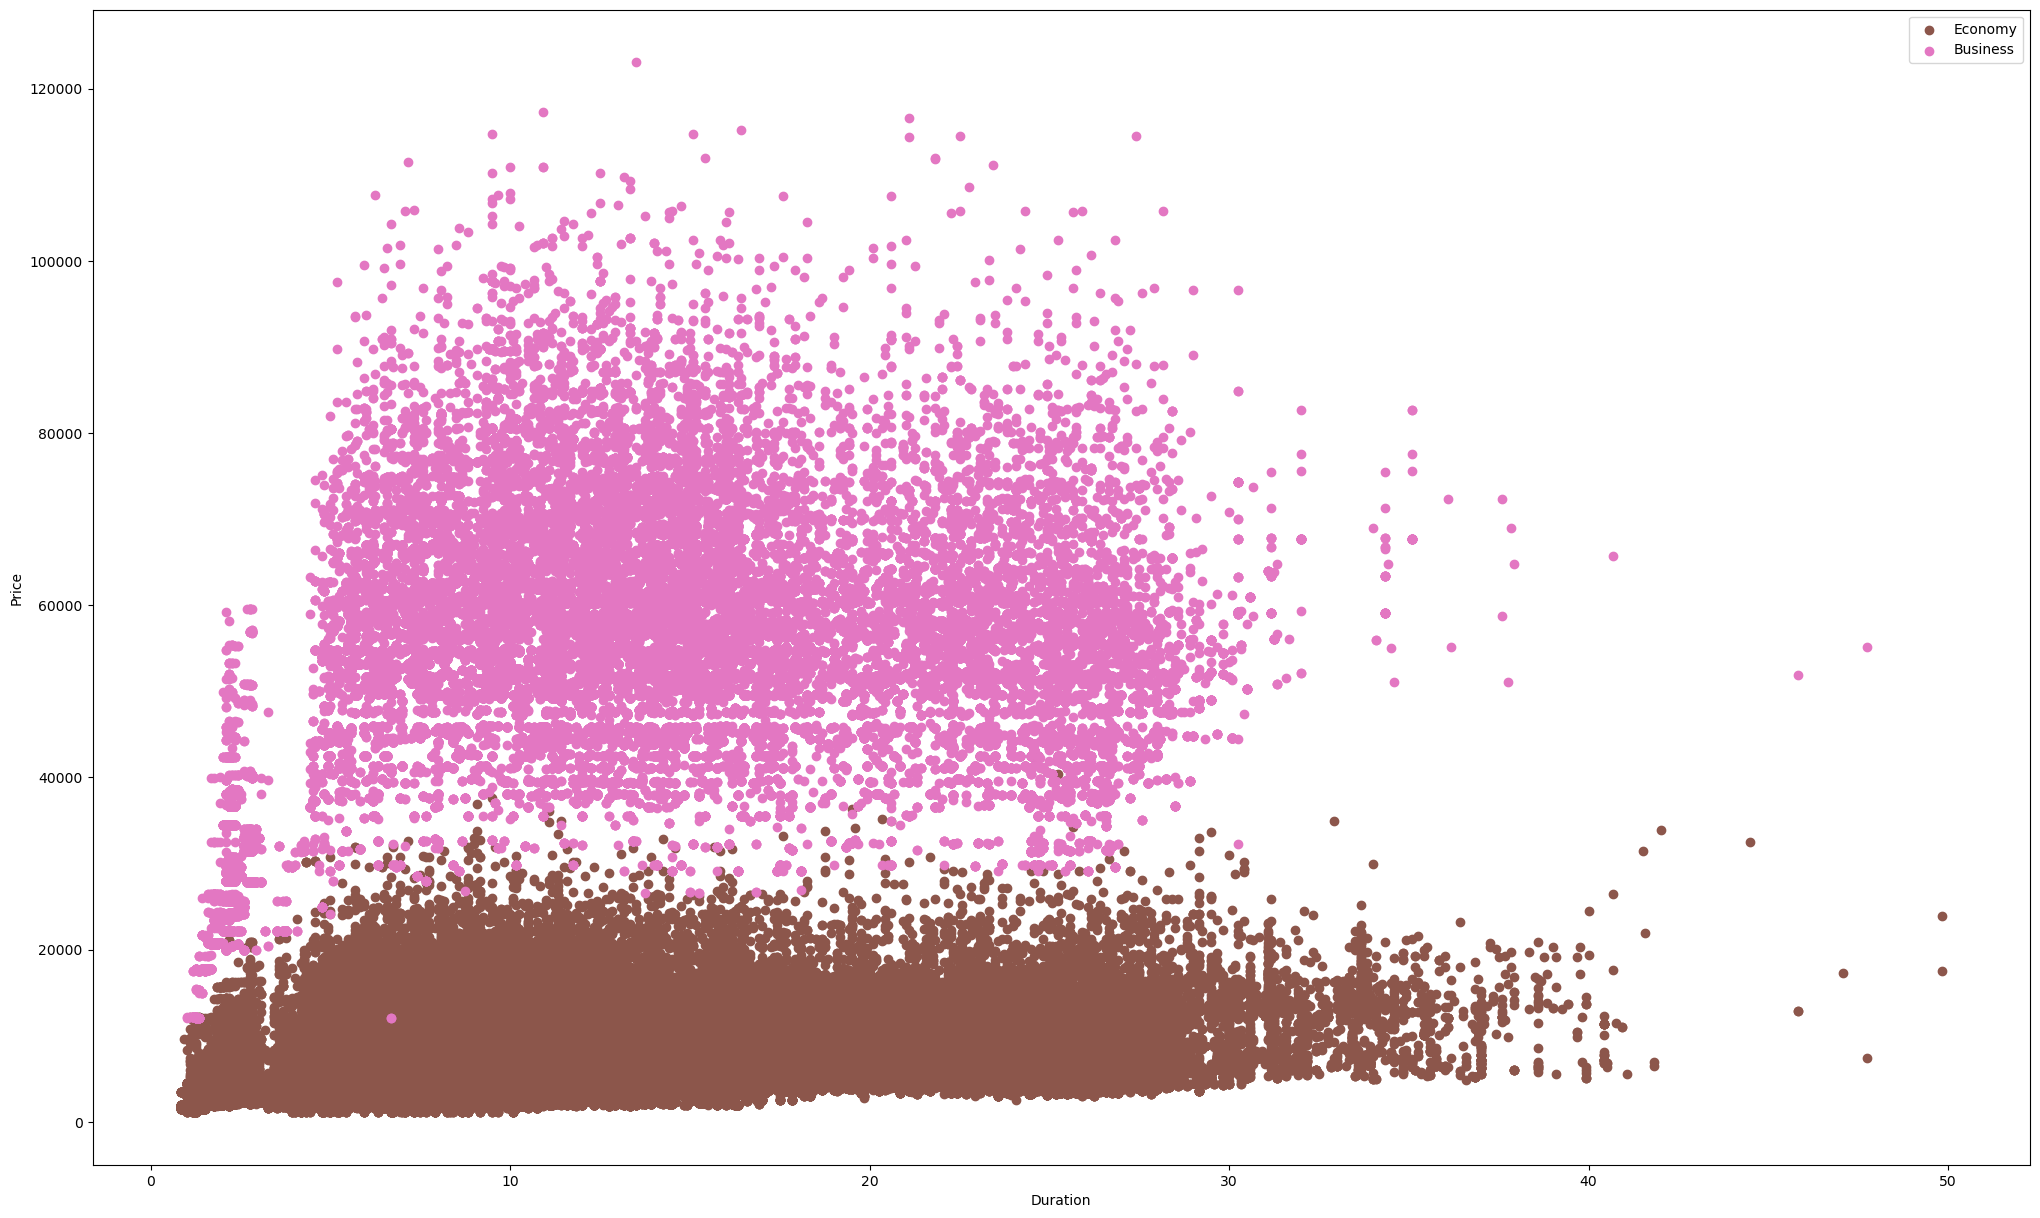

In [223]:
# 좌석에 따른 비행시간-가격 관계 알아보기
plt.figure(figsize=(25, 15))
plt.scatter(data=flight_economy, x='duration', y='price', c='#8c564b')
plt.scatter(data=flight_business, x='duration', y='price', c='#e377c2')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.legend(('Economy' , 'Business'))
plt.show()

# 대체로 가격은 좌석 등급이 구분짓는 편이고 비행시간과 강한 관계를 갖지 않는다. 

### 2-1-7. Heatmap(히트맵)
- 데이터의 배열을 색상으로 표현하여 여러 카테고리의 상관관계를 한눈에 파악하기 좋다
- matplotlib보다 seaborn라이브러리로 시각화하는 것이 좋다.

In [224]:
eco_corr.columns

Index(['duration', 'days_left', 'price'], dtype='object')

C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\4151196791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  eco_corr = flight_economy.corr()


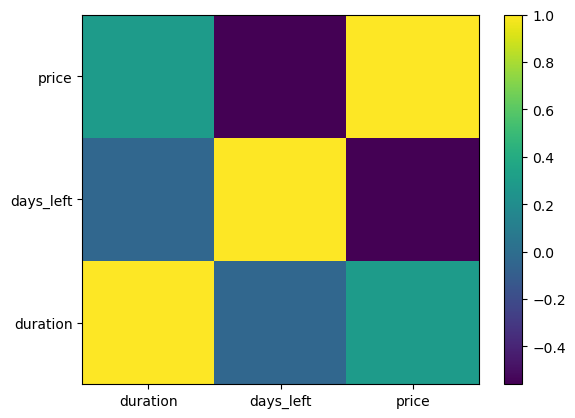

In [225]:
eco_corr = flight_economy.corr()
plt.pcolor(eco_corr)
plt.xticks(np.arange(0.5, len(eco_corr.index), 1), eco_corr.index)
plt.yticks(np.arange(0.5, len(eco_corr.index), 1), eco_corr.index)
plt.colorbar()
plt.show()

<Axes: >

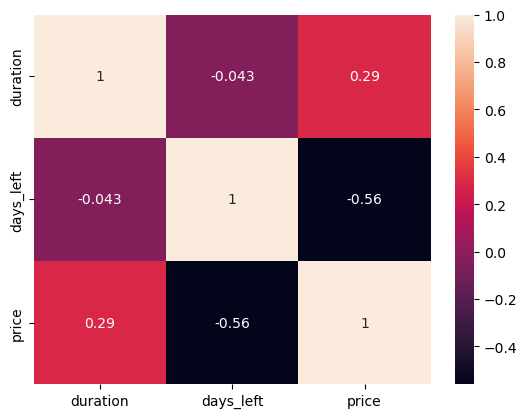

In [226]:
sns.heatmap(eco_corr, annot=True)

### 2-1-8. 기타 함수(matplotlib)
- figure() : 객체를 보여줄 영역 지정
- grid(Boolean) : 그리드 표기 여부
- show() : 화면에 보여줌
- title(str) : 그래프 제목
- xlabel(str) : X축 이름
- xlim([하한, 상한]) 
- xticks : 눈금 값과 크기, 기울기 설정

### 2-1-9. categorical plot(범주형 산점도)
- 범주형 데이터와 수치형 데이터의 관계를 시각화

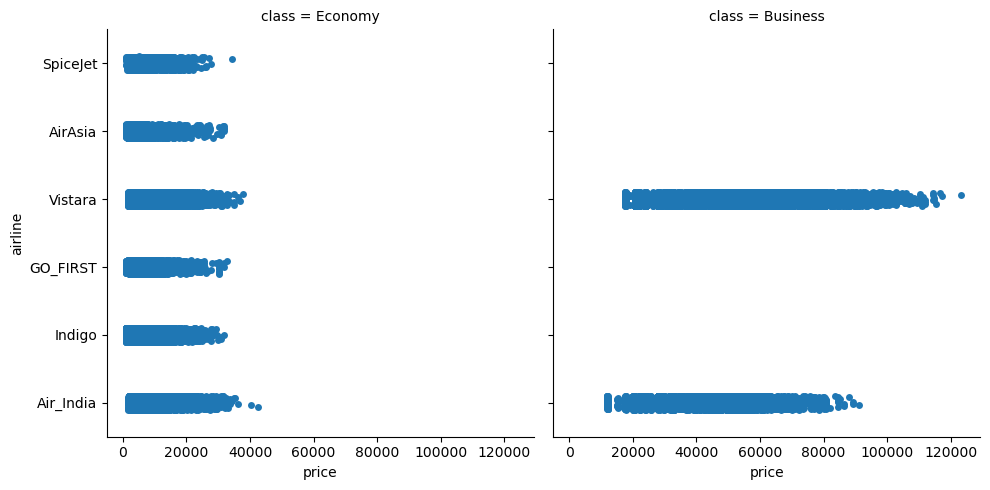

In [227]:
# 항공사별 항공권 가격이 좌석 등급에 따라 어떻게 변하는지 확인하기
sns.catplot(y='airline', x='price', col='class', data=flight)

#비즈니스 클래스는 2개 항공사만 운영하고 있다
# 이코노미 클래스는 대략 40000이하의 가격을 형성하고 있다.

### 2-1-10. lineat model plot(선형 회귀 모델 그래프)
- 산점도 + 직선
- 선형관계, 이상치 확인에 용이

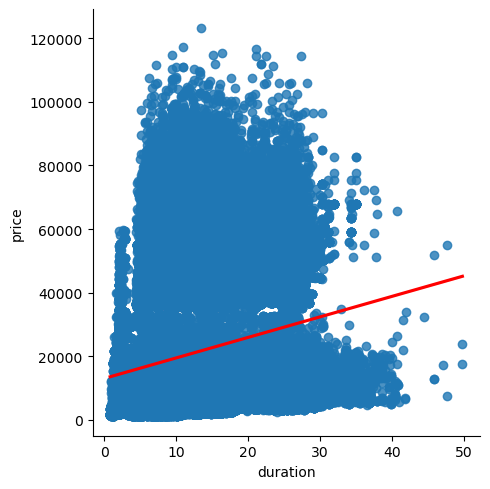

In [228]:
# 비행시간과 항공권 가격간 선형관계 확인
sns.lmplot(x='duration', y='price', data=flight, line_kws={'color':'red'})

# 약한 선형관계를 이루고 있다.

### 2-1-11. count plot(빈도 그래프)
- 범주형 데이터에 대해 항목별 막대그래프를 그려줌
- 해당 특성을 구성하고 있는 값을 구분해서 보여준다

<Axes: xlabel='airline', ylabel='count'>

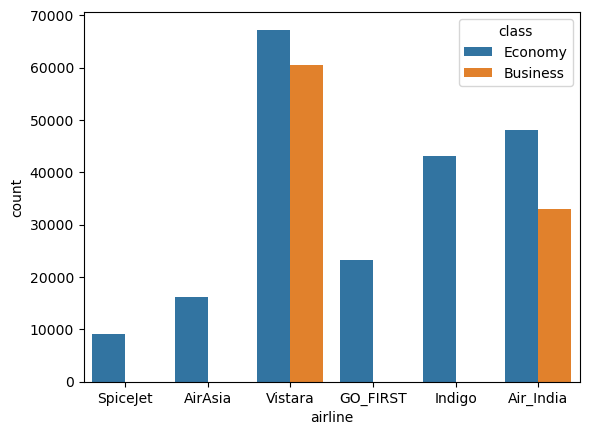

In [229]:
# 항공권 데이터의 빈도를 항공사별로 구분하기
sns.countplot(x='airline', hue='class', data=flight)

### 2-1-12. joint plot(조인트 그래프)
- 산점도 + 히스토그램
- 데이터 분포와 상관관계를 한 번에 확인
- 수치형 데이터만 표현 가능
- 산점도에서 알 수 없었던 빈도 밀도를 바로 확인할 수 있음

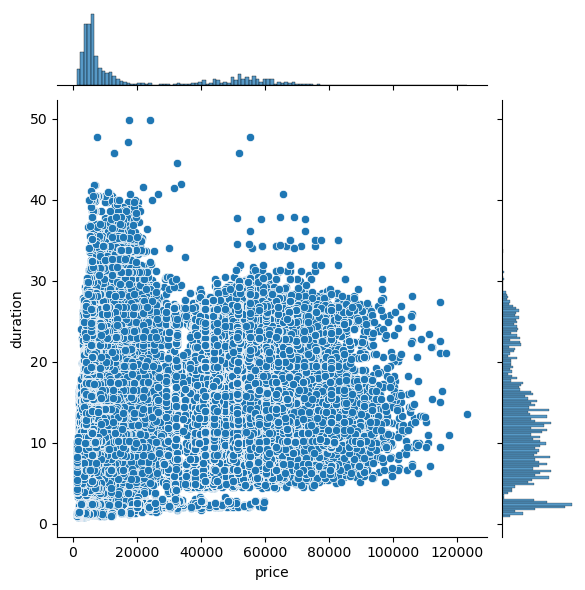

In [230]:
# 가격과 비행시간
sns.jointplot(data=flight, x='price', y='duration')

# 양의 관계를 가지고 있다. 
# 비행시간은 0~20 사이에 분포하고 있으며,
# 항공권 가격은 0~10000 사이로 형성되어 있음

# 3.데이터 전처리

## 3-1. 수치형 데이터 정제

### 3-1-1. 결측치 파악
- 수집 누락, 데이터 유실 등으로 발생한 결측치(NULL)는 반드시 처리를 해야 한다.

In [231]:
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


#### 실습을 위해 결측치 생성하기

In [232]:
flight = pd.read_csv('./Flight_Price_Prediction/Clean_Dataset.csv', encoding='cp949', index_col='Unnamed: 0')

# 결측치 생성하기
import random

# 시드 고정하기
random.seed(2023)
np.random.seed(2023)

# 핸덤한 위치에 결측치 5,000개를 포함한 데이터 만들기
flight_na = flight.copy()
for x in range(0,5000):
    flight_na.iloc[random.randint(0,300152), random.randint(0,10)] = np.nan

#결측치 처리 여부 확인을 위한 1,3번 인덱스 전체 결측치 처리하기
flight_na.iloc[1] = np.nan
flight_na.iloc[3] = np.nan



#### 결측치 확인하기

In [233]:
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          299703 non-null  float64
 9   days_left         299723 non-null  float64
 10  price             299714 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.5+ MB


##### 결측치 개수 확인(isnull().sum())

In [234]:
flight_na.isnull().sum()

airline             468
flight              464
source_city         472
departure_time      430
stops               487
arrival_time        455
destination_city    483
class               438
duration            450
days_left           430
price               439
dtype: int64

### 3-1-2. 결측치 처리
- 좋은 분석 모델을 만들기 위해 중요한 단계이다
- 추가 조사나 정확한 예측으로 결측치를 채우는 것이 좋다
- 실무에서는 추가 조사, 재측정이 어렵기 때문에 실무자의 견해가 많이 반영된다
- 같은 데이터라도 분서가에 따라 결측치 처리 방법이 달라질 수 있다 
- 따라서 최대한 데이터 현실을 반영한 결측치 처리가 되어야 분석을 정확하게 할 수 있다

- **결측치 처리 방식**
    - 결측치가 포함된 record 제거하기
    - 결측치가 포함된 칼럼 제거
    - 결측치를 특정 값으로 채우기(이전, 이후값, 중간값 등)

In [235]:
flight_na_origin = flight_na.copy()
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          299703 non-null  float64
 9   days_left         299723 non-null  float64
 10  price             299714 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.5+ MB


#### 1)결측치 삭제하기
- 결측치의 비중이 적을 때 사용해야 한다
- 데이터의 특성이 사라져서 모두 반영하지 못할 수도 있기 때문임

##### 행 삭제

In [236]:
# 결측치를 하나라도 가지는 행 삭제
flight_na = flight_na.dropna()
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295192 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           295192 non-null  object 
 1   flight            295192 non-null  object 
 2   source_city       295192 non-null  object 
 3   departure_time    295192 non-null  object 
 4   stops             295192 non-null  object 
 5   arrival_time      295192 non-null  object 
 6   destination_city  295192 non-null  object 
 7   class             295192 non-null  object 
 8   duration          295192 non-null  float64
 9   days_left         295192 non-null  float64
 10  price             295192 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.0+ MB


In [237]:
# 모든 데이터가 결측치인 "헹"삭제
flight_na = flight_na.dropna(how='all')
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295192 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           295192 non-null  object 
 1   flight            295192 non-null  object 
 2   source_city       295192 non-null  object 
 3   departure_time    295192 non-null  object 
 4   stops             295192 non-null  object 
 5   arrival_time      295192 non-null  object 
 6   destination_city  295192 non-null  object 
 7   class             295192 non-null  object 
 8   duration          295192 non-null  float64
 9   days_left         295192 non-null  float64
 10  price             295192 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.0+ MB


##### 칼럼(열) 제거
- 단일 특성에 일정 비중 이상의 결측치가 있는 경우
- 컬럼이 모델링에 중요하게 사용될 수 있기 때문에 기준을 명확하게 해야한다.
- 보통 50%가 넘어가면 삭제한다.

In [238]:
flight_na = flight_na_origin.copy()

flight_na = flight_na.drop(['stops', 'flight'], axis=1)
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   source_city       299681 non-null  object 
 2   departure_time    299723 non-null  object 
 3   arrival_time      299698 non-null  object 
 4   destination_city  299670 non-null  object 
 5   class             299715 non-null  object 
 6   duration          299703 non-null  float64
 7   days_left         299723 non-null  float64
 8   price             299714 non-null  float64
dtypes: float64(3), object(6)
memory usage: 22.9+ MB


In [239]:
flight_na.dropna()
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   source_city       299681 non-null  object 
 2   departure_time    299723 non-null  object 
 3   arrival_time      299698 non-null  object 
 4   destination_city  299670 non-null  object 
 5   class             299715 non-null  object 
 6   duration          299703 non-null  float64
 7   days_left         299723 non-null  float64
 8   price             299714 non-null  float64
dtypes: float64(3), object(6)
memory usage: 22.9+ MB


#### 2)결측치 대체하기
- 평균값, 중간값, 최빈값을 주로 사용한다
- 어떤 값을 사용해도 데이터에 오차가 존재한다
- 너무 많은 데이터를 같은 값으로 대체하면 데이터 편향이 발생할 수 있다

##### 평균값으로 대체

In [240]:
flight_na = flight_na_origin.copy()
flight_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [241]:
flight_na = flight_na.fillna(flight_na.mean())
flight_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.5+ MB


C:\Users\Eunjeong\AppData\Local\Temp\ipykernel_16192\3496419415.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flight_na = flight_na.fillna(flight_na.mean())


In [242]:
flight_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220991,26.006369,20888.967105
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220991,26.006369,20888.967105
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000


##### fillna(method = "?")
- pad, ffill : 이전 인덱스에 있는 값을 사용함
- backfillm bfill : 다음 인덱스에 있는 값을 사용함

In [243]:
flight_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220991,26.006369,20888.967105
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220991,26.006369,20888.967105
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000


In [244]:
# 다른 메서드 사용해보기

flight_na = flight_na.fillna(method='bfill')
flight_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,12.220991,26.006369,20888.967105
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,12.220991,26.006369,20888.967105
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000


### 3-1-3. 이상치(outlier) 파악
- 특정 추세를 벗어난 데이터는 시각화로 확인하는 것이 좋다
- 산점도, 선형회귀 모델 그래프, 조인트 그래프를 사용하면 쉽게 확인 가능하다
- 중앙값을 크게 벗어난 데이터는 IQR로 이상치를 확인한다

#### 1)Z-score로 확인하기
- 신뢰구간은 일반적으로 95%를 사용한다
- Z-score의 1.96을 기준으로 이상치를 확인한다
- 신뢰구간은 특성에 맞게 조정가능하다

In [245]:
# Z-score를 기준으로 신뢰수준이 95%인 데이터 확인하기
flight[(abs( (flight['price'] - flight['price'].mean()) / flight['price'].std() ))>1.96]

# 총 12493개의 이상치가 검출되었다.

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206691,Vistara,UK-809,Delhi,Evening,one,Morning,Mumbai,Business,12.42,1,74640
206692,Vistara,UK-813,Delhi,Evening,one,Morning,Mumbai,Business,14.67,1,74640
206693,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Business,24.42,1,74640
206694,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Business,26.00,1,74640
206695,Vistara,UK-813,Delhi,Evening,one,Night,Mumbai,Business,26.67,1,74640
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


#### 2)IQR로 확인하기
- IQR = 제3사분위수 - 제1사분위수
- 이상치 : 제1사분위수(제3사분위수)에서 IQR의 1.5배만큼 뺀(더한) 값보다 작은(큰) 값

In [246]:
# IQR 이상치 검출 함수 만들기

def find_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = 1.5 * (Q3 - Q1)
    outlier = dataframe[( (dataframe[column] > (Q3 + IQR)) | (dataframe[column] < (Q1 - IQR)) )]
    return len(outlier)

In [247]:
print("price 이상치 : ", find_outliers(flight, 'price'))
print("duration 이상치 : ", find_outliers(flight, 'duration'))
print("days_left 이상치 : ", find_outliers(flight, 'days_left'))

price 이상치 :  123
duration 이상치 :  2110
days_left 이상치 :  0


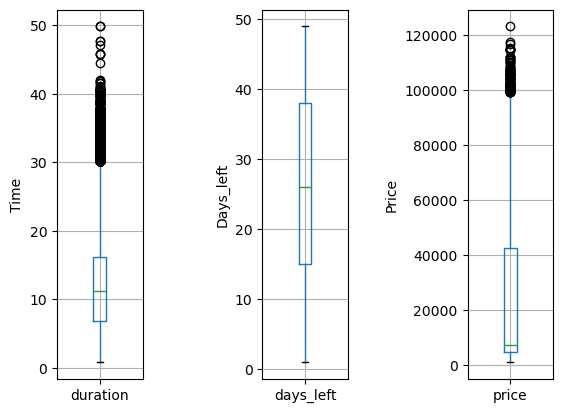

In [248]:
# 시각화해서 위 결과와 비교하기

plt.figure()

plt.subplot(151) # 1행 5열에서 첫번째 영역을 의미
flight[['duration']].boxplot()
plt.ylabel("Time")

plt.subplot(153) # 1행 5열에서 첫번째 영역을 의미
flight[['days_left']].boxplot()
plt.ylabel("Days_left")

plt.subplot(155) # 1행 5열에서 첫번째 영역을 의미
flight[['price']].boxplot()
plt.ylabel("Price")

plt.show()

### 3-1-4. 이상치 처리
- 삭제 or 대체

#### 1)이상치 삭제

In [249]:
flight_origin = flight.copy()

In [250]:
# Z-score에 의한 이상치 제거
outlier = flight[(abs( (flight['price'] - flight['price'].mean()) / flight['price'].std() ))>1.96].index
outlier

Int64Index([206691, 206692, 206693, 206694, 206695, 206696, 206697, 206698,
            206699, 206784,
            ...
            300107, 300108, 300109, 300110, 300147, 300148, 300149, 300150,
            300151, 300152],
           dtype='int64', length=12493)

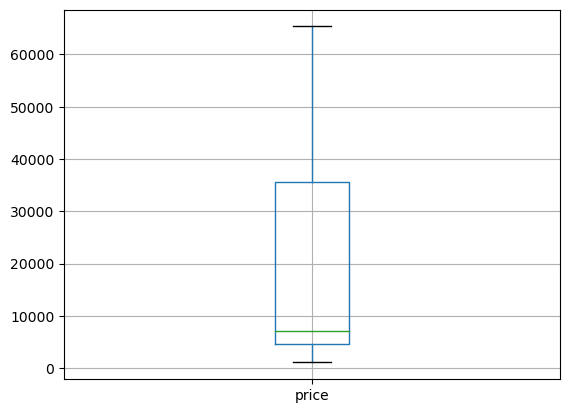

In [251]:
# 인덱스에 해당하는 행 삭제하기

flight_outlier_clean = flight.drop(index=outlier)

plt.figure()
flight_outlier_clean[['price']].boxplot()
plt.show()

# box plot을 이용해서 보면 이상치가 사라진 것을 확인할 수 있다.

#### 2)이상치 대체
- 최소, 최대값으로 대체

In [ ]:
# IQR 이상치 대체 함수 만들기

def replace_outliers(flight, column):
    Q1 = flight[column].quantile(0.25)
    Q3 = flight[column].quantile(0.75)
    IQR = 1.5 * (Q3 - Q1)
    
    Min = Q1 - IQR
    Max = Q3 + IQR
    
    flight.loc[(flight[column] > Max) , column] = Max 
    flight.loc[(flight[column] < Min) , column] = Min 
    
    return flight

In [252]:
replace_outliers(flight=flight, column='price')['price'].unique()

Q1 = flight['price'].quantile(0.25)
Q3 = flight['price'].quantile(0.75)
IQR = 1.5 * (Q3 - Q1)

print(Q1)
print(Q3)
print(IQR)


TypeError: replace_outliers() got an unexpected keyword argument 'flight'

price 이상치 개수 :  0


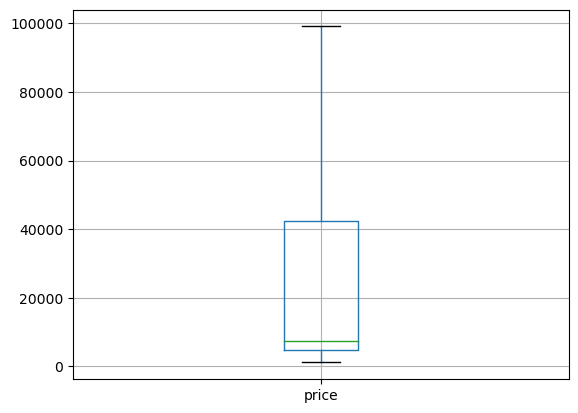

In [ ]:
flight_outlier_clean = replace_outliers(flight=flight, column='price')

print('price 이상치 개수 : ', find_outliers(flight_outlier_clean, 'price'))

plt.figure()
flight_outlier_clean[['price']].boxplot()
plt.show()

### 3-1-5. 구간화(Binning)
- 연속형 데이터를 특정 구간으로 나누어 범주형 또는 순위형 데이터로 변환하는 방법을 의미한다
- 점수를 등급으로 나누거나 나이를 세대로 나누는 것을 의미한다
- 구간화를 적용하면 이상치로 발생가능한 문제를 줄이고, 결과에 대한 해석이 쉬워질 수 있다.
- 구간화에는 동일 길이로 나누거나 동일 개수로 구간화하는 방법이 있다.
- 구간화 방법
    - cut(길이)
    - qcut(개수)    

#### 1)길이로 구간화(cut)

In [ ]:
# 비행시간 나누기 0~5, 5~10, 10~ - distance(shot, medium, long)

flight['distance'] = pd.cut( flight['duration'], bins=[0, 5, 10, flight['duration'].max()], labels=['short' ,'medium', 'long'])
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,short
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,short
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,short
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,short
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,short


In [ ]:
flight['distance'].value_counts()

# 장거리 항공편이 많구나

long      169879
medium     84761
short      45513
Name: distance, dtype: int64

#### 2)개수로 구간화(qcut)

In [ ]:
# price 4개로 나누기

flight['price_rate'] = pd.cut( flight['price'], bins=4, labels=['cheap' ,'nomal', 'expensive', 'too expensive'])
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance,price_rate
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,short,cheap
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,short,cheap
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,short,cheap
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,short,cheap
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,short,cheap


In [ ]:
flight['price_rate'].value_counts()

cheap            210133
expensive         55425
nomal             30664
too expensive      3931
Name: price_rate, dtype: int64

## 3-2. 범주형 데이터 정제
- 컴퓨터가 이해할 수 있게 인코딩 해줘야 한다.
- Categorical Encoding이라고 부른다

### 3-2-1. 레이블 인코딩
- 알파벳순으로 정렬한 후 번호를 매기는 방식

#### 1)판다스 이용
- 인덱스 기준으로, 카테고리가 등장하는 순서를 기반으로 숫자를 매핑한다
- factorize는 결과로 튜플값을 반환하기 때문에 데이터프레임의 새로운 칼럼 생성을 위해 array로 변경하고
- reshape하여 새로운 칼럼으로 만들어 준다

In [ ]:
flight = flight_origin.copy()

flight['label_encoding'] = pd.factorize(flight['airline'])[0].reshape(-1,1)
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2


In [ ]:
print(flight['airline'].value_counts(), '\n')
print(flight['label_encoding'].value_counts())

# 인코딩된 값도 원래 값이랑 개수가 동일하다

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64 

2    127859
5     80892
4     43120
3     23173
1     16098
0      9011
Name: label_encoding, dtype: int64


#### 2)Scikit-Learn 이용

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
flight['airline_label_encoder'] = le.fit_transform(flight['airline'])
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding,airline_label_encoder
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,4
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,4
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2,5
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2,5


In [ ]:
print(flight['airline'].value_counts(), '\n')
print(flight['airline_label_encoder'].value_counts())

# 인코딩된 값도 원래 값이랑 개수가 동일하다

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64 

5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: airline_label_encoder, dtype: int64


In [ ]:
# 역변환 가능
le.inverse_transform(flight['airline_label_encoder']).reshape(-1,1)

array([['SpiceJet'],
       ['SpiceJet'],
       ['AirAsia'],
       ...,
       ['Vistara'],
       ['Vistara'],
       ['Vistara']], dtype=object)

### 3-2-2. 원핫 인코딩

#### 1)_판다스(get_dummies)

In [ ]:
flight = flight_origin.copy()

pd.get_dummies(flight['class'])

,Business,Economy
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
300148,1,0
300149,1,0
300150,1,0
300151,1,0


In [ ]:
# 원 데이터에 적용하기
flight = pd.get_dummies(data=flight, columns=['class'])
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,class_Business,class_Economy
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953,0,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953,0,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956,0,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955,0,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955,0,1


#### 2)_사이킷런(OneHotEncoder)

In [ ]:
flight = flight_origin.copy()

from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder로 인코딩
oh = OneHotEncoder()
# encoder = oh.fit_transform(flight['class'].values.reshape(-1,1)).toarray()
encoder = oh.fit_transform(flight[['class']]).toarray()

# 원핫 인코딩 결과 데이터 프레임으로 만들기
df_Onehot = pd.DataFrame(encoder, columns=['class_' + col for col in oh.categories_[0]])

# 원핫 인코딩 결과를 원본 데이터에 넣기
df1 = pd.concat([flight, df_Onehot], axis=1)
df1.head()

,A,B,C,D,E,class_Business,class_Economy
0,foo,one,small,1.0,2.0,0.0,1.0
1,foo,one,large,2.0,4.0,0.0,1.0
2,foo,one,large,2.0,5.0,0.0,1.0
3,foo,two,small,3.0,5.0,0.0,1.0
4,foo,two,small,3.0,6.0,0.0,1.0


In [ ]:
flight['class'].values.reshape(-1,1)

array([['Economy'],
       ['Economy'],
       ['Economy'],
       ...,
       ['Business'],
       ['Business'],
       ['Business']], dtype=object)

In [ ]:
encoder2 = oh.fit_transform(flight[['class']]).toarray()
pd.DataFrame(encoder2, columns=['class_' + col for col in oh.categories_[0]])
df3 = pd.concat([df, df_Onehot], axis=1)

,A,B,C,D,E,class_Business,class_Economy
0,foo,one,small,1.0,2.0,0.0,1.0
1,foo,one,large,2.0,4.0,0.0,1.0
2,foo,one,large,2.0,5.0,0.0,1.0
3,foo,two,small,3.0,5.0,0.0,1.0
4,foo,two,small,3.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...
300148,NaN,NaN,NaN,NaN,NaN,1.0,0.0
300149,NaN,NaN,NaN,NaN,NaN,1.0,0.0
300150,NaN,NaN,NaN,NaN,NaN,1.0,0.0
300151,NaN,NaN,NaN,NaN,NaN,1.0,0.0


## 3-3. 스케일링(Scaling)
- 각 컬럼에 데이터의 상대적 크기에 따라 분석 결과와 모델링 결과가 달라질 수 있다
- 0~1000값의 A칼럼과 0~10값의 B칼럼을 가지고 분석을 수행하면 상대적으로 큰 수의 A칼럼의 영향이 더 크게 반영된다
- 따라서 수치형 데이터는 상대적 크기 차이를 제거할 필요가 있다

### 3-3-1. Min-Max Scaling
- 0~1사이의 값으로 변환한다
- X(std) = (x - X최소값) / (X최댓값 - X최솟값)

In [253]:
flight = flight_origin.copy()

# 수치형 데이터만 추출
flight_num = flight[['duration', 'days_left', 'price']]

# 직접 정규화 하기
flight_num = (flight_num - flight_num.min()) / (flight_num.max() - flight_num.min())
flight_num.head()

,duration,days_left,price
0,0.027347,0.0,0.039749
1,0.030612,0.0,0.039749
2,0.027347,0.0,0.039773
3,0.028980,0.0,0.039765
4,0.030612,0.0,0.039765


In [254]:
# 정규화 확인하기
flight_num.describe()

# min, max가 모두 0,1것을 확인할 수 있다.

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,0.232470,0.520932,0.162215
std,0.146775,0.282521,0.186099
min,0.000000,0.000000,0.000000
25%,0.122449,0.291667,0.030156
50%,0.212653,0.520833,0.051818
75%,0.313061,0.770833,0.339570
max,1.000000,1.000000,1.000000


- min-max Scaling은 극단적인 이상치에 민감하기 때문에 꼭 이상치 처리를 완료한 후 사용해야 한다.

### 3-3-2. 표준화
- 평균이 0, 표준편차가 1인 표준정규분포로 변환한다
- X(norm) = (x - X평균) / (X표준편차)

In [256]:
# 수치형 데이터만 추출
flight_num = flight[['duration', 'days_left', 'price']]

# 표준화 수식 적용
flight_num = (flight_num - flight_num.mean()) / (flight_num.std())
flight_num.head()

,duration,days_left,price
0,-1.397528,-1.843872,-0.658067
1,-1.375282,-1.843872,-0.658067
2,-1.397528,-1.843872,-0.657935
3,-1.386405,-1.843872,-0.657979
4,-1.375282,-1.843872,-0.657979


In [257]:
# 정규화 확인하기
flight_num.describe()

# min, max가 모두 0,1것을 확인할 수 있다.

,duration,days_left,price
count,3.001530e+05,3.001530e+05,3.001530e+05
mean,9.090311e-17,1.810487e-16,-1.939266e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.583847e+00,-1.843872e+00,-8.716567e-01
25%,-7.495861e-01,-8.114997e-01,-7.096143e-01
50%,-1.350141e-01,-3.503362e-04,-5.932152e-01
75%,5.490796e-01,8.845399e-01,9.530162e-01
max,5.229282e+00,1.695689e+00,4.501823e+00


## 3-4. 변수 선택하기

### 3-4-1. 신규변수 생성
- 하나의 데이터로 여러 개의 새로운 칼럼을 만들어야 하는 경우가 있다

#### 1)_ 1개 → n개로 나누기
- 보통 항공기의 기체명은 '항공기 제조사 + 모델명'으로 만들어진다
- 이를 활용해 제조사와 모델명 2개의 새로운 칼럼을 만들자

In [258]:
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [299]:
# 제조사와 모델명을 분리하는 함수 만들기
def split_flight(flight):
    manufacture = flight.split('-')[0]
    model = flight.split('-')[1]
    # print(flight)
    return manufacture, model    

In [300]:
# lamba, apply 이용해서 새로운 칼럼 생성하기
flight['manufacture'], flight['model'] = zip(*flight['flight'].apply(lambda x : split_flight(x)))
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709,"([Delhi, Delhi, Delhi, Delhi, Delhi, Delhi, De..."
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,8157,"([Delhi, Delhi, Delhi, Delhi, Delhi, Delhi, De..."
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5,764,"([Delhi, Delhi, Delhi, Delhi, Delhi, Delhi, De..."
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK,995,"([Delhi, Delhi, Delhi, Delhi, Delhi, Delhi, De..."
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK,963,"([Delhi, Delhi, Delhi, Delhi, Delhi, Delhi, De..."


#### 2)_ n개 → 1개로 합쳐서 새로운 칼럼 생성

- source_city와 destination_city를 튜플로 묶어서 route 칼럼 만들기

In [327]:
# lamba, apply 이용해서 새로운 칼럼 생성하기(2가지 방법)
flight['route'] = list(zip(flight['source_city'], flight['destination_city']))
flight['route'] = flight[['source_city', 'destination_city']].apply(tuple, axis=1)
flight.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,manufacture,model,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709,"(Delhi, Mumbai)"
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,8157,"(Delhi, Mumbai)"
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5,764,"(Delhi, Mumbai)"
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK,995,"(Delhi, Mumbai)"
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK,963,"(Delhi, Mumbai)"
